In [24]:
import imp
import numpy as np
import pandas as pd
import seaborn as sns
import properties as prop
import utils as u

imp.reload(prop)
imp.reload(u)

const = prop.Constants()

In [25]:
const.k_r_o(0.6), const.k_r_w(0.4)

(0.8862857142857143, 0.600857142857143)

In [29]:
data_flder = 'processed_data'
_s_o_matrix_history = np.load(f'{data_flder}/s_o_matrix_history.npy')
_p_matrix_history = np.load(f'{data_flder}/p_matrix_history.npy')
_neibours = np.load(f'{data_flder}/neibours.npy')
_const_p_wells_keys = np.load(f'{data_flder}/const_p_wells_keys.npy')
_q_w_rate = np.load(f'{data_flder}/q_w_rate.npy')
_q_o_rate = np.load(f'{data_flder}/q_o_rate.npy')
_s_o_hist = pd.read_csv(f'{data_flder}/s_o_hist.csv', index_col=0)
_s_w_hist = pd.read_csv(f'{data_flder}/s_w_hist.csv', index_col=0)

_const_p_wells_keys = [(key[0], key[1]) for key in list(_const_p_wells_keys)]
_neibours = [(key[0], key[1]) for key in list(_neibours)]

In [30]:
_const_p_wells_keys

[(3, 3), (11, 11)]

In [31]:
__s_o_hist = {}
for c in _s_o_hist.columns:
    __s_o_hist[(int(c), int(_s_o_hist[c].values[0]))] = _s_o_hist[c].values[1:]

__s_w_hist = {}
for c in _s_w_hist.columns:
    __s_w_hist[(int(c), int(_s_w_hist[c].values[0]))] = _s_w_hist[c].values[1:]

<AxesSubplot:>

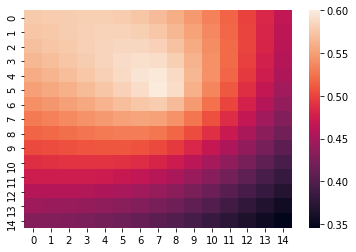

In [32]:
sns.heatmap(_s_o_matrix_history[0])

In [42]:
_q_o_rate[1] / _q_w_rate[1]

0.04814437120944406

KeyboardInterrupt: 

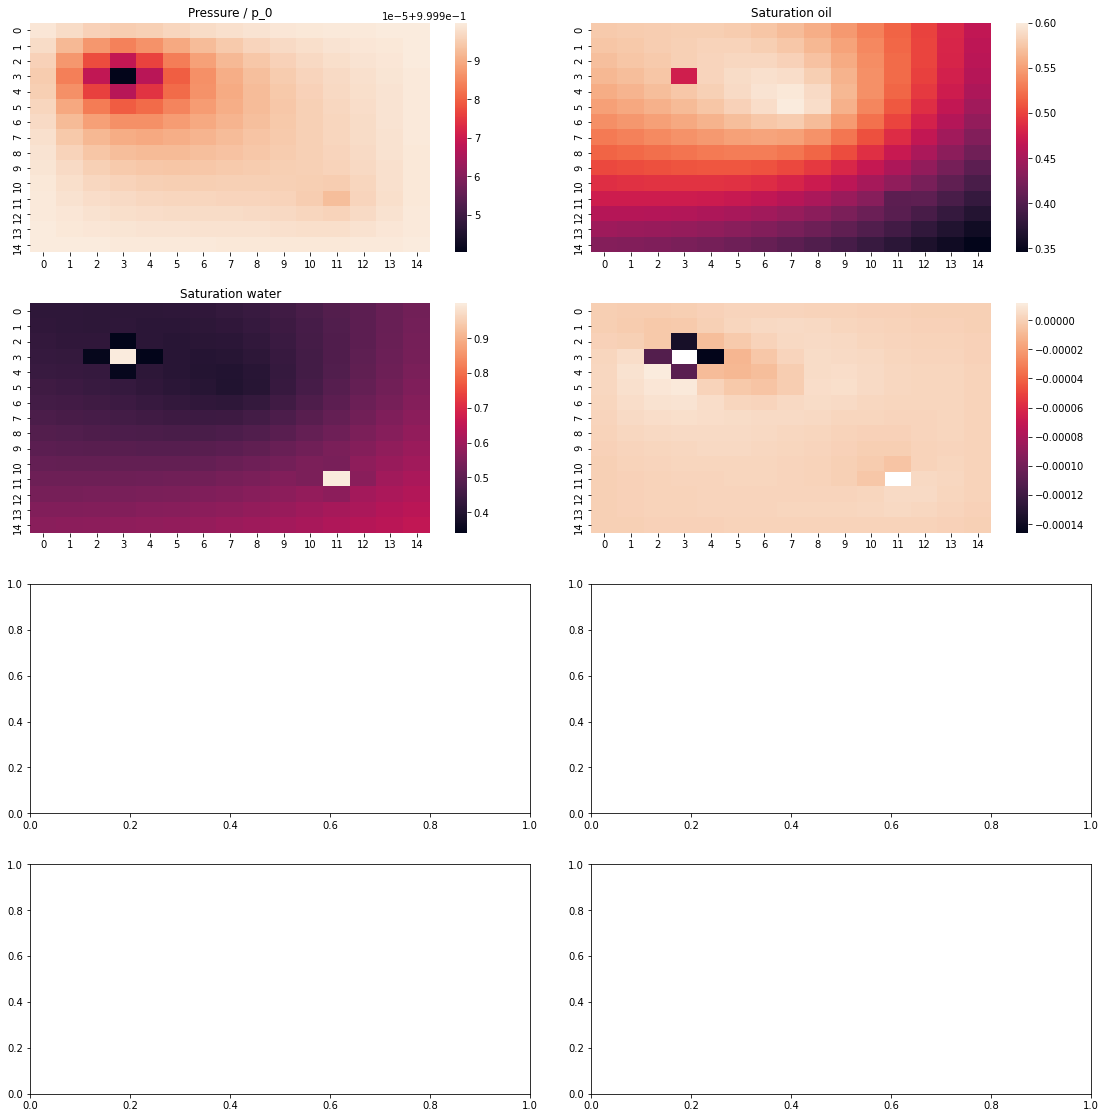

In [26]:
for i in range(len(_s_o_matrix_history)):
    u.plot_stuff_iter(q_w_rate=_q_w_rate, q_o_rate=_q_o_rate, const_p_wells_keys=_const_p_wells_keys, s_o_hist=__s_o_hist,
                      s_w_hist=__s_w_hist, s_o_matrix_history=_s_o_matrix_history, neibours=_neibours,
                      p_matrix_history=_p_matrix_history, i=i
                      )